<a href="https://colab.research.google.com/github/Ahsan-techie/GenderClassificationFromEye/blob/main/GenderClassificationFromEye.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Problem Statement:**
The anthropometric analysis of the human face is an essential study for performing craniofacial plastic and reconstructive surgeries. Facial anthropometrics are affected by various factors such as age, gender, ethnicity, socioeconomic status, environment, and region.  

Plastic surgeons who undertake the repair and reconstruction of facial deformities find the anatomical dimensions of the facial structures useful for their surgeries. These dimensions are a result of the Physical or Facial appearance of an individual. Along with factors like culture, personality, ethnic background, age; eye appearance and symmetry contributes majorly to the facial appearance or aesthetics. 

### **Problem Solution:**
Our objective is to build a model to scan the image of an eye of a patient and find if the gender of the patient is male or female.

### **Dataset**
The dataset contains eye pictures of males and females. The dataset can be downloaded from the below link.

Dataset Link: https://drive.google.com/file/d/1f7uslI-ZHidriQFZR966_aILjlkgDN76/view?usp=sharing

In [ ]:
classes_names = ['male','female']


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/MyDrive/eye_gender_data.zip

Streaming output truncated to the last 5000 lines.
  inflating: eye_gender_data/train/Image_4799.jpg  
  inflating: eye_gender_data/train/Image_48.jpg  
  inflating: eye_gender_data/train/Image_480.jpg  
  inflating: eye_gender_data/train/Image_4800.jpg  
  inflating: eye_gender_data/train/Image_4801.jpg  
  inflating: eye_gender_data/train/Image_4802.jpg  
  inflating: eye_gender_data/train/Image_4803.jpg  
  inflating: eye_gender_data/train/Image_4804.jpg  
  inflating: eye_gender_data/train/Image_4805.jpg  
  inflating: eye_gender_data/train/Image_4806.jpg  
  inflating: eye_gender_data/train/Image_4807.jpg  
  inflating: eye_gender_data/train/Image_4808.jpg  
  inflating: eye_gender_data/train/Image_4809.jpg  
  inflating: eye_gender_data/train/Image_481.jpg  
  inflating: eye_gender_data/train/Image_4810.jpg  
  inflating: eye_gender_data/train/Image_4811.jpg  
  inflating: eye_gender_data/train/Image_4812.jpg  
  inflating: eye_gender_data/train/Image_4813.jpg  
  inflating: eye_

In [ ]:
X_train=[]
X_test=[]
import os
import glob
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# making function to apply in blob to get files in sorted order
def number(filename):
    a = (filename.split('_'))
    b = (a[3].split('.'))
    # a =number("Image_1441.jpg")
    # int(a[1].split('.')[0])
    
    return int(b[0])
    
path_to_data = '/content/eye_gender_data/train'
# # # for img in (os.listdir(path)):
# # #   image = cv2.imread (img)
# # #   X_train.append (image)
X_train = [cv2.imread(file,0) for file in sorted(glob.glob('/content/eye_gender_data/train/*.jpg'),key=number)]
# X_train_images = [file for file in sorted(glob.glob('/content/eye_gender_data/train/*.jpg'),key=number)]
# yy = [print(number(file)) for file in glob.glob('/content/eye_gender_data/train/*.jpg')]



In [ ]:
X_train[0].shape

(53, 53)

In [ ]:
## to find high dimensions so make images in same dimensions
max = 0
ii =0
for i in range(len(X_train)):
  if X_train[i].shape[0]>max:
    max = X_train[i].shape[0]
    ii = i
print(max,ii)


113 8214


In [ ]:
X_train[8214].shape

(113, 113)

In [ ]:
test_path = '/content/eye_gender_data/test'
# for img in (os.listdir(test_path)):
#   X_test.append(img)
X_test = [cv2.imread(file,0) for file in sorted(glob.glob('/content/eye_gender_data/test/*.jpg'),key=number)]

In [ ]:
import pandas as pd
df_y_train = pd.read_csv('/content/eye_gender_data/Training_set.csv')

In [ ]:
y_train = df_y_train['label']

In [ ]:
df_y_test = pd.read_csv('/content/eye_gender_data/Testing_set.csv')


In [ ]:
print(len(X_train),len(X_test))

9220 2305


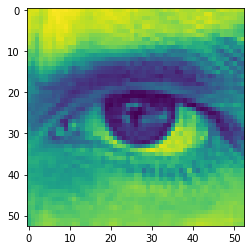

In [ ]:
plt.imshow(X_train[0])



In [ ]:
X_test[0].dtype

dtype('uint8')

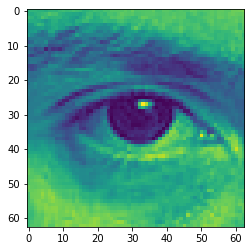

In [ ]:
plt.imshow(X_test[0])

In [ ]:
print(X_train[6].shape)

(55, 55)


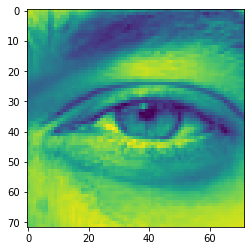

In [ ]:
plt.imshow(X_train[4])

In [ ]:
print(y_train[4])

male


In [ ]:
## resizing images in same dimensions
X_train_resized = []
for x in range(len(X_train)):
  X_train_resized.append(cv2.resize(X_train[x],(113,113)))



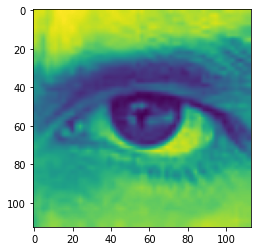

In [ ]:
plt.imshow(X_train_resized[0])

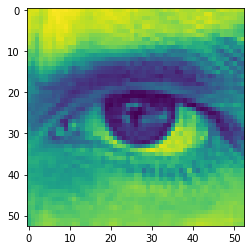

In [ ]:
plt.imshow(X_train[0])

In [ ]:
X_train_resized[0].shape

(113, 113)

In [ ]:
X_train_resized[1].shape

(113, 113)

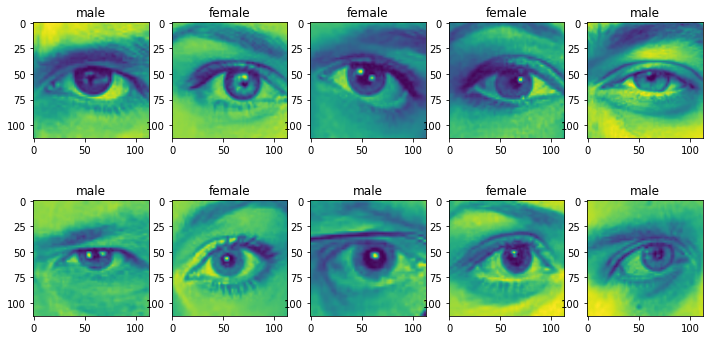

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(12, 6))
c = 0
for i in range(10):
  idx = i // 5
  idy = i % 5
  ax[idx, idy].imshow(X_train_resized[i])
  ax[idx, idy].set_title(y_train[i])

In [ ]:
X_test_resized=[]
for x in range(len(X_test)):
  X_test_resized.append(cv2.resize(X_test[x],(113,113)))

In [ ]:
X_test[0].shape, X_test_resized[0].shape

((63, 63), (113, 113))

In [ ]:
X_train_gr = []
for x in range(len(X_train)):
  X_train_gr.append(X_train_resized[x].reshape(113,113,1))

In [ ]:
X_test_gr = []
for x in range(len(X_test)):
  X_test_gr.append(X_test_resized[x].reshape(113,113,1))

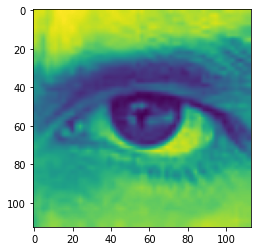

In [ ]:
plt.imshow(X_train_gr[0].reshape(113,113))

In [ ]:
INPUT_SHAPE = (113, 113, 1)

# define sequential model
model = tf.keras.models.Sequential()
# define conv-pool layers - set 1
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1),
activation='relu', padding='valid', input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# define conv-pool layers - set 2
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1),
activation='relu', padding='valid'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# add flatten layer
model.add(tf.keras.layers.Flatten())

# add dense layers with some dropout
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))

# add output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# compile model
model.compile(optimizer='adam',
loss='BinaryCrossentropy',
metrics=['accuracy'])



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 111, 111, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 55, 55, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 53, 53, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 26, 26, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 21632)             0         
                                                                 
 dense (Dense)               (None, 256)               5

In [ ]:
X_train_scaled = []
for x in range(len(X_train)):
  X_train_scaled.append(X_train_gr[x]/255)


In [ ]:
# convert list into numpy array
X_train_np = np.array(X_train_scaled)
# label conversion into numbers for sigmoid activation function
y_train = pd.factorize(y_train)

len(y_train)

2

In [ ]:
y_train[0].dtype

dtype('int64')

In [ ]:
EPOCHS = 100


es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3,
restore_best_weights=True,
verbose=1)


In [ ]:
history = model.fit(X_train_np, y_train[0],
batch_size=32,
callbacks=[es_callback],
validation_split=0.2, epochs=EPOCHS,verbose=1)

Epoch 1/100
231/231 [==============================] - 65s 274ms/step - loss: 0.5613 - accuracy: 0.7074 - val_loss: 0.3926 - val_accuracy: 0.8292
Epoch 2/100
231/231 [==============================] - 65s 282ms/step - loss: 0.3946 - accuracy: 0.8236 - val_loss: 0.3743 - val_accuracy: 0.8416
Epoch 3/100
231/231 [==============================] - 63s 274ms/step - loss: 0.3441 - accuracy: 0.8520 - val_loss: 0.3114 - val_accuracy: 0.8693
Epoch 4/100
231/231 [==============================] - 64s 278ms/step - loss: 0.2983 - accuracy: 0.8722 - val_loss: 0.2938 - val_accuracy: 0.8791
Epoch 5/100
231/231 [==============================] - 63s 274ms/step - loss: 0.2571 - accuracy: 0.8972 - val_loss: 0.2762 - val_accuracy: 0.8850
Epoch 6/100
231/231 [==============================] - 64s 277ms/step - loss: 0.2359 - accuracy: 0.9037 - val_loss: 0.2736 - val_accuracy: 0.8850
Epoch 7/100
231/231 [==============================] - 64s 275ms/step - loss: 0.1975 - accuracy: 0.9207 - val_loss: 0.2649 -

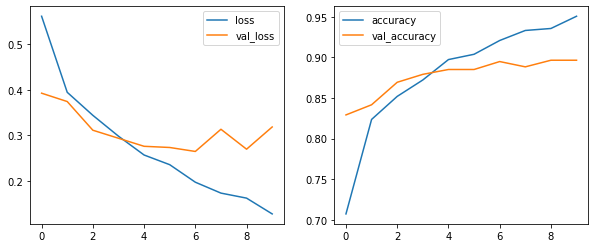

In [ ]:
import pandas as pd

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

history_df = pd.DataFrame(history.history)
#history_df
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0])
history_df[['accuracy', 'val_accuracy']].plot(kind='line', ax=ax[1]);

In [ ]:
X_test_scaled = []
for x in range(len(X_test)):
  X_test_scaled.append(X_test_gr[x]/255)
X_test_np = np.array(X_test_scaled)
predictions = model.predict(X_test_np)
predictions[:10]

array([[2.30249763e-03],
       [2.11088419e-01],
       [1.06058806e-01],
       [1.20306909e-02],
       [4.72396612e-04],
       [5.71507215e-03],
       [9.80071425e-01],
       [1.33665204e-02],
       [7.82046318e-02],
       [9.99877572e-01]], dtype=float32)

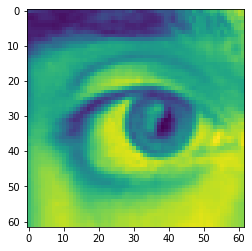

In [ ]:
plt.imshow(X_test[3])

In [ ]:
predictions = np.round(predictions)
predictions_label = ['male' if j==0 else 'female' for j in predictions]


In [ ]:
predictions_label[:10]

['male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'female',
 'male',
 'male',
 'female']

In [ ]:
df_y_test['label'] = predictions_label
# df_y_test.drop('filename',axis=1,inplace=True)


In [ ]:

df_y_test['label'][:22]

0       male
1       male
2       male
3       male
4       male
5       male
6     female
7       male
8       male
9     female
10    female
11      male
12    female
13      male
14    female
15    female
16      male
17    female
18      male
19    female
20      male
21      male
Name: label, dtype: object

In [ ]:
df_y_test.to_csv('Testing.csv',index=False)